# Experimentations

In [1]:
import wikipedia
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline

In [15]:
"""Lists of articles that will be used to determine the average number of links per page."""
article_titles = ["Donald Trump", "Sanskrit", "University of California, Berkeley"]

In [19]:
def get_article_frequencies(name, totals):
    used = set()
    try:
        article = wikipedia.page(name)
    except:
        return
    for i in article.links:
        try:
                sub_article = wikipedia.page(i)
        except:
            continue
        if(sub_article.title not in used):
            totals.append(len(sub_article.links))
            used.add(sub_article.title)
    return totals

First, running this experimnent on just one of the three articles.

In [7]:
#Computing the average number of links on all links in a Wikipedia page.
%time totals = get_article_frequencies("Sanskrit", [])

/Users/virgoman97/anaconda/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


CPU times: user 1min, sys: 4.8 s, total: 1min 5s
Wall time: 7min 15s


count     628.000000
mean      357.533439
std       306.048678
min         2.000000
25%       154.000000
50%       276.500000
75%       482.000000
max      2086.000000
dtype: float64


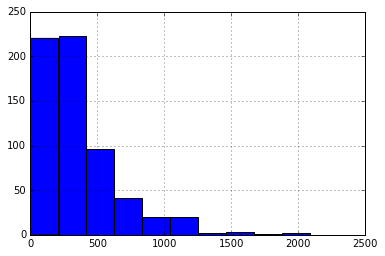

In [25]:
sanskrit_links = pd.Series(totals)
print(sanskrit_links.describe())
sanskrit_links.hist()

In [33]:
sansk_links = len(wikipedia.page("Sanskrit").links)
print("Links on page Sanskrit:", sansk_links)
print("Links on next level:", len(totals))
print("Average time per article:", (7 * 60 + 15) / sansk_links)

Links on page Sanskrit: 661
Links on next level: 628
Average time per article: 0.6580937972768532


In [20]:
#Running on 3 articles, noting time.

def test_multiple_article_frequencies(titles):
    totals = []
    for i in titles:
        get_article_frequencies(i, totals)
    return totals

%time all_totals = test_multiple_article_frequencies(article_titles)

/Users/virgoman97/anaconda/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


CPU times: user 6min 40s, sys: 31.3 s, total: 7min 11s
Wall time: 57min 54s


To calculate the estimate number of links on a Wikipedia page, used a technique dubbed Parental Searching - instead of specifying a large list of Wikipedia articles to count the number of links on, I specified a small list of Wikipedia articles and simply traversed all of their links ('children'). 'Parent' links were related to politics, business, ancient India, mathematics, education. Above graph shows the distribution of the number of links per page searched.

This calculation took a very long time. 

count    3599.000000
mean      391.590997
std       353.425466
min         1.000000
25%       139.000000
50%       294.000000
75%       525.500000
max      2446.000000
dtype: float64


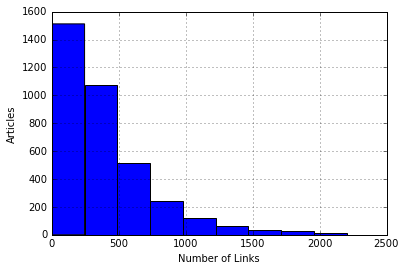

In [24]:
article_links = pd.Series(all_totals)
print(article_links.describe())
hist = article_links.hist()
hist.set_xlabel("Number of Links")
hist.set_ylabel("Articles")

In [34]:
articles_traversed = sum([len(wikipedia.page(i).links) for i in article_titles])
time_seconds = 60*57 + 54
avg_time = articles_traversed / time_seconds
print("Articles Traversed:", articles_traversed)
print("Total articles on next level:", len(all_totals))
print("Time (seconds):", time_seconds)
print("Average Time per Article:", avg_time)

Articles Traversed: 3878
Total articles on next level: 3599
Time (seconds): 3474
Average Time per Article: 1.1162924582613702
